In [0]:
# Importar SparkSession
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, avg, from_unixtime

# Criação da sessão Spark
spark = SparkSession.builder.appName('BitcoinAnalysis').getOrCreate()

# Caminho para o dataset CSV (use o caminho gerado após o upload do arquivo)
file_path = "/FileStore/tables/dataset-2.csv"

# Carregar os dados do Bitcoin no DataFrame
df = spark.read.csv(file_path, header=True, inferSchema=True)

# Exibir o esquema do dataset
df.printSchema()

# Limpeza de dados: Remover NaNs
df_cleaned = df.na.drop()

# Conversão de timestamp Unix para uma data legível
df_cleaned = df_cleaned.withColumn('date', from_unixtime(col('Timestamp')).cast('date'))

# Agrupar os dados por data e calcular o preço médio ponderado diário
df_daily_avg = df_cleaned.groupBy('date').agg(avg('Weighted_Price').alias('Daily_Avg_Price'))

# Ordenar por data
df_daily_avg = df_daily_avg.orderBy('date')

# Mostrar os primeiros 10 resultados
df_daily_avg.show(10)


root
 |-- Timestamp: integer (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Volume_(BTC): double (nullable = true)
 |-- Volume_(Currency): double (nullable = true)
 |-- Weighted_Price: double (nullable = true)

+----------+------------------+
|      date|   Daily_Avg_Price|
+----------+------------------+
|2011-12-31|    4.471602874575|
|2012-01-01| 4.806666666666667|
|2012-01-02|               5.0|
|2012-01-03|            5.2525|
|2012-01-04| 5.208159313655556|
|2012-01-05|6.2841271510761905|
|2012-01-06| 6.438999047607142|
|2012-01-07|               6.8|
|2012-01-08|              6.95|
|2012-01-09| 6.582769666666665|
+----------+------------------+
only showing top 10 rows



In [0]:
# Salvar os resultados em um novo arquivo CSV
output_path = "/FileStore/tables/bitcoin_daily_avg.csv"
df_daily_avg.write.csv(output_path, header=True)


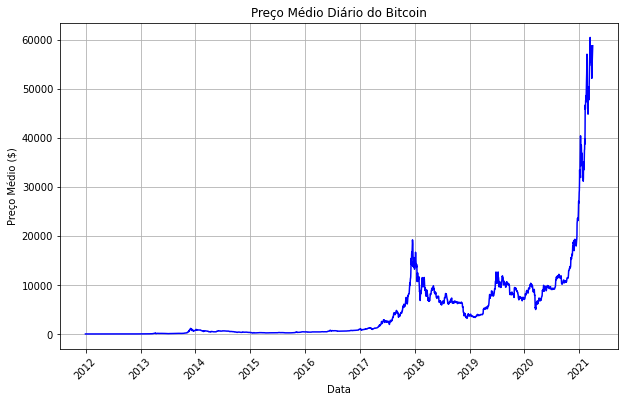

In [0]:
# Importar bibliotecas de visualização
import matplotlib.pyplot as plt
import pandas as pd

# Converter o DataFrame Spark para um DataFrame Pandas
df_pandas = df_daily_avg.toPandas()

# Criar o gráfico de preço médio diário
plt.figure(figsize=(10,6))
plt.plot(df_pandas['date'], df_pandas['Daily_Avg_Price'], color='blue', label='Preço Médio Diário')
plt.xlabel('Data')
plt.ylabel('Preço Médio ($)')
plt.title('Preço Médio Diário do Bitcoin')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
